# 0. Create Quarto YAML Cell and Import Libraries

The cell given above must go at the very top of your Notebook, even before the title!  Be sure to include the `---` on the first and last lines.  No other content should go in this raw cell!  This is what it should look like:

```

---
title: "Encoding Music Sample Homework Project"
author: 'Richard Freedman'
date: 'June 25, 2024'

format:
  html:
    code-fold: true
    embed-resources: true
plotly-connected: true
jupyter: python3

---
```

##  Now the Title, Your Name, and Date:

You can use markdown to control the size and look of this information:

```
Music 255:  Encoding Music
My First Homework Project
Richard Freedman
September 2, 2024
```

And now the **Import** statements, where you load the relevant libraries.  

Note that the last to items (for Quarto and Warnings) are especially important.

In [1]:
# import libraries

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


# setup plotting for quarto
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"

# supress warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Motivation

What is your point of inquiry? What are you trying discover? What do you expect to find? How do these questions relate to themes and problems considered in the course so far?

What specific readings or musical repertories are involved, and why do they matter in this context (be sure to cite them, and to follow the Music Style Guide as you do so)?

Also see the [Encoding Music Tutorial](https://github.com/RichardFreedman/Encoding_Music/blob/main/01_Tutorials/07_Pandas_Filter_Find_Group.md)



# 2. Implementation

How did you put your query into practice? What did you need to do with or to your data along the way?

* What logical steps did you follow as you thought about getting there (expressed in pseudo code; perhaps in bullet-point form in your markdown cell)?
* Which tools (or methods) did you select, and why were they right for the job?
If you chose to create some kind of visualization (a chart, network or map), how did you decide on the right representation for the task at hand?
* What challenges did you face as you worked to put the steps into action in code? Did you need to clean or tidy your data? Filter, sort, or group it in some way?
* What were the most important tools or approaches you deployed that others might like to know about?

Remember to use verbatim code or block code to show your work as needed. 

Remember to add comments to your code to show the most important steps.

If you learned from or adapted some code suggested in Encoding Music, or another resource, it would be good to cite that documentation, too.

**Note**:  Your code cells and their outputs go below. 

When you 'render' this with **Quarto** (see [instructions here](https://github.com/RichardFreedman/Encoding_Music/blob/main/01_Tutorials/01_Notebook_Introduction_Quarto.md#Export-and-Publish-with-Quarto)) the code will be 'hidden' behind a dropdown arrow.  The output will be rendered in HTML.

### 2a Get The Beatles Data

- Remember, these data a bit different:
- Some are WIDE, others are TIDY and LONG
- Some are just Spotify, or just BB, or just US
- You will need to decide which one is right for your question and how to combine or use them for the job!~




In [2]:
#  Beatles Spotify Data (just clean, not tidy!)
beatles_spotify_csv = 'https://raw.githubusercontent.com/RichardFreedman/Encoding_Music/refs/heads/main/02_Lab_Data/Beatles/Beatles_Spotify_2026.csv'
beatles_spotify_clean = pd.read_csv(beatles_spotify_csv)


# Beatles Billboard Data (clean not tidy!)
beatles_billboard_clean_csv = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTvOhZSzoa8kwkmYOzwuAGq3Piaujeabu41wVgAhSPfS0IONz2zi_nG5Km_5GO8B8P6tor0r8CacyNF/pub?output=csv'
bb_clean = pd.read_csv(beatles_billboard_clean_csv)


# and perhaps OUR Cleaned Metadata too!  A pickle!
our_cleaned_beatles_metadata_pkl = 'https://github.com/RichardFreedman/Encoding_Music/raw/refs/heads/main/02_Lab_Data/Beatles/our_clean_beatles_data.pkl'
our_clean_beatles = pd.read_pickle(our_cleaned_beatles_metadata_pkl)



# BB and Spotify Tidy and Clean
beatles_bb_spotify_final = 'https://github.com/RichardFreedman/Encoding_Music/raw/refs/heads/main/02_Lab_Data/Beatles/beatles_data_combined_clean_tidy.pkl'
beatles_bb_spotify_tidy = pd.read_pickle(beatles_bb_spotify_final)

In [3]:
# check the columns for reference
list(bb_clean.columns)

['Title',
 'Year',
 'Album.debut',
 'Duration',
 'Other.releases',
 'Genre',
 'Songwriter',
 'Lead.vocal',
 'Top.50.Billboard']

### 2b  Filtering

- Filtering is done via **logical conditions**.  For ex:

`bb_clean['Album.debut'] == 'Help!'`

Returns a Boolean series for the given column

In [4]:
# try it

bb_clean['Album.debut'] == 'Rubber Soul'

0      False
1      False
2      False
3      False
4      False
       ...  
304    False
305    False
306    False
307    False
308    False
Name: Album.debut, Length: 309, dtype: bool

Now you can use that Boolean series as a 'truth table' to mask the original dataframe.

You could read the following as:  "Show me `bb_clean` evalutes to `True`"

`bb_clean[bb_clean['Album.debut'] == 'Help!']`

In [5]:
# try it
bb_clean[bb_clean['Album.debut'] == 'Rubber Soul']


,Title,Year,Album.debut,Duration,Other.releases,Genre,Songwriter,Lead.vocal,Top.50.Billboard
78,Girl,1965,Rubber Soul,153,17,"folk, pop/rock",Lennon,Lennon,0
133,I'm Looking Through You,1965,Rubber Soul,147,15,"folk rock, pop/rock",McCartney,"McCartney, with Lennon",0
142,In My Life,1965,Rubber Soul,148,12,"baroque pop, pop/rock",Lennon and McCartney,Lennon,0
180,Michelle,1965,Rubber Soul,160,19,pop/rock,"McCartney, with Lennon",McCartney,0
188,Norwegian Wood (This Bird Has Flown),1965,Rubber Soul,125,18,"folk rock, raga rock, pop/rock","Lennon, with McCartney",Lennon,0
217,Run for Your Life,1965,Rubber Soul,138,9,"rock, rock and roll, pop/rock","Lennon, with McCartney",Lennon,0
263,The Word,1965,Rubber Soul,161,6,"rock, pop/rock",Lennon and McCartney,"Lennon, McCartney and Harrison",0
266,Think for Yourself,1965,Rubber Soul,138,7,pop/rock,Harrison,Harrison,0
277,Wait,1965,Rubber Soul,136,8,"folk rock, pop/rock","McCartney, with Lennon","McCartney, with Lennon",0
302,You Won't See Me,1965,Rubber Soul,202,11,pop/rock,McCartney,McCartney,0


In [6]:
# what are the unique  songs in that album?
my_album = bb_clean[bb_clean['Album.debut'] == 'Rubber Soul']

# unique song values as a list
list(my_album['Title'].unique())

['Girl',
 "I'm Looking Through You",
 'In My Life',
 'Michelle',
 'Norwegian Wood (This Bird Has Flown)',
 'Run for Your Life',
 'The Word',
 'Think for Yourself',
 'Wait',
 "You Won't See Me"]

Or let's filter the **Spotify data** by some **threshold** for a given audio feature

This:  `beatles_spotify_clean['valence'] > .6` will return another Boolean series, 

which we can use to mask our original df


`beatles_spotify_clean[beatles_spotify_clean['valence'] > .8]`



In [7]:
happy_songs = beatles_spotify_clean[beatles_spotify_clean['valence'] > .8]
happy_songs.head()

,year,album,song,spotify url,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
2,1970,Let It Be,Across the Universe,https://open.spotify.com/track/4dkoqJrP0L8FXft...,0.257,0.412,1,-11.788,1,0.0287,0.3610,0.000087,0.0702,0.858,152.126,228133,4
3,1965,Help!,Act Naturally,https://open.spotify.com/track/0IxxqsYBcCHEQ1H...,0.702,0.447,7,-10.122,1,0.0308,0.3660,0.000000,0.1530,0.944,93.020,150373,4
4,1963,With The Beatles,All I've Got to Do,https://open.spotify.com/track/5tztLBvTlNC15Np...,0.490,0.579,1,-10.301,0,0.0344,0.2170,0.000000,0.0644,0.879,119.403,122573,4
5,1963,With The Beatles,All My Loving,https://open.spotify.com/track/4joiWvli4qJVEW6...,0.416,0.563,1,-8.724,0,0.0298,0.2070,0.000000,0.3430,0.900,77.560,127853,4
10,1966,Revolver,And Your Bird Can Sing,https://open.spotify.com/track/4KRgqwb4kvBuTz1...,0.555,0.650,4,-6.936,1,0.0282,0.0067,0.049100,0.2360,0.966,132.590,120493,4


#### Your Turn

- Can you think of some other ways to filter the Billboard or Spotify Data to return an interesting subset of albums, songs, writers, genres?

### 2c Bins

- Spotify data are mainly scalars (the audio features) and integers (like the durations, or tempo figures in bpm)
- Sometimes it's useful to turn these into categories.

In [8]:
# Here we are setting a threshold (above or below .5) for 'danceability' then assigning False or True to a new Dance Tune


beatles_spotify_clean.loc[beatles_spotify_clean["danceability"].astype(float).between(0.000, 0.500, "right"), "Dance Tune"] = False
beatles_spotify_clean.loc[beatles_spotify_clean["danceability"].astype(float).between(0.501, 1.000, "right"), "Dance Tune"] = True

In [9]:
beatles_spotify_clean.head()

,year,album,song,spotify url,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Dance Tune
0,1967,Sgt. Pepper's Lonely Hearts Club Band,A Day in the Life,https://open.spotify.com/track/0hKRSZhUGEhKU6a...,0.364,0.457,4,-14.162,0,0.0675,0.290,0.000106,0.9220,0.175,163.219,337413,4,False
1,1964,A Hard Day's Night,A Hard Day's Night,https://open.spotify.com/track/5J2CHimS7dWYMIm...,0.590,0.805,0,-6.481,1,0.0371,0.137,0.000000,0.0996,0.797,138.514,154200,4,True
2,1970,Let It Be,Across the Universe,https://open.spotify.com/track/4dkoqJrP0L8FXft...,0.257,0.412,1,-11.788,1,0.0287,0.361,0.000087,0.0702,0.858,152.126,228133,4,False
3,1965,Help!,Act Naturally,https://open.spotify.com/track/0IxxqsYBcCHEQ1H...,0.702,0.447,7,-10.122,1,0.0308,0.366,0.000000,0.1530,0.944,93.020,150373,4,True
4,1963,With The Beatles,All I've Got to Do,https://open.spotify.com/track/5tztLBvTlNC15Np...,0.490,0.579,1,-10.301,0,0.0344,0.217,0.000000,0.0644,0.879,119.403,122573,4,False


#### Bins with Cut

In [10]:
# we can also do this with 'cut'
# here the SPANS of the buckets are the same, but they have different numbers of items in them
binned_data = pd.cut(beatles_spotify_clean["danceability"], bins=4)
binned_data

0       (0.33, 0.513]
1      (0.513, 0.696]
2       (0.145, 0.33]
3       (0.696, 0.88]
4       (0.33, 0.513]
            ...      
186     (0.33, 0.513]
187     (0.33, 0.513]
188     (0.33, 0.513]
189     (0.696, 0.88]
190    (0.513, 0.696]
Name: danceability, Length: 191, dtype: category
Categories (4, interval[float64, right]): [(0.145, 0.33] < (0.33, 0.513] < (0.513, 0.696] < (0.696, 0.88]]

#### Bins with QCut

In [11]:
# or with 'qcut', in which the COUNTS of items in each bin is the same (but the spans are different!)

# each bin will have the same proportion of items in it
q_binned = pd.qcut(beatles_spotify_clean["danceability"], q=4)
q_binned

0      (0.145, 0.418]
1      (0.533, 0.615]
2      (0.145, 0.418]
3       (0.615, 0.88]
4      (0.418, 0.533]
            ...      
186    (0.145, 0.418]
187    (0.418, 0.533]
188    (0.145, 0.418]
189     (0.615, 0.88]
190    (0.418, 0.533]
Name: danceability, Length: 191, dtype: category
Categories (4, interval[float64, right]): [(0.145, 0.418] < (0.418, 0.533] < (0.533, 0.615] < (0.615, 0.88]]

In [12]:
# and how assign those bins to an actual column!

beatles_spotify_clean['dance_binned'] = pd.qcut(beatles_spotify_clean["danceability"], q=4, labels=['l', 'm', 'h', 's'])
beatles_spotify_clean.head()

,year,album,song,spotify url,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Dance Tune,dance_binned
0,1967,Sgt. Pepper's Lonely Hearts Club Band,A Day in the Life,https://open.spotify.com/track/0hKRSZhUGEhKU6a...,0.364,0.457,4,-14.162,0,0.0675,0.290,0.000106,0.9220,0.175,163.219,337413,4,False,l
1,1964,A Hard Day's Night,A Hard Day's Night,https://open.spotify.com/track/5J2CHimS7dWYMIm...,0.590,0.805,0,-6.481,1,0.0371,0.137,0.000000,0.0996,0.797,138.514,154200,4,True,h
2,1970,Let It Be,Across the Universe,https://open.spotify.com/track/4dkoqJrP0L8FXft...,0.257,0.412,1,-11.788,1,0.0287,0.361,0.000087,0.0702,0.858,152.126,228133,4,False,l
3,1965,Help!,Act Naturally,https://open.spotify.com/track/0IxxqsYBcCHEQ1H...,0.702,0.447,7,-10.122,1,0.0308,0.366,0.000000,0.1530,0.944,93.020,150373,4,True,s
4,1963,With The Beatles,All I've Got to Do,https://open.spotify.com/track/5tztLBvTlNC15Np...,0.490,0.579,1,-10.301,0,0.0344,0.217,0.000000,0.0644,0.879,119.403,122573,4,False,m


#### Your Turn


- how would you find all the songs with 'low' danceability

### 2c Groupby:  Durations by Album

- Groupby is a powerful part of Pandas--allowing us to:
1) subset the data in various ways
2) apply the same transformation to each subset
3) return the results in a new df

For example:  
```python
# we know we can filter our data to show just ONE album
my_album = beatles_spotify[beatles_spotify['album'] == 'Rubber Soul']

# and we can get the _mean_ duration of those songs
my_album['duration_ms'].mean()
np.float64(152309.42857142858)
```

How would we do this for EACH album?  Perhaps get a list of all albums, then run each through the same function and build a new df.

But there is an easier way:  **groupby**.  Learn about the operation at Pandas Tutor [here](https://pandastutor.com/vis.html#).

In [13]:
# mean duration for ONE album
my_album = beatles_spotify_clean[beatles_spotify_clean['album'] == 'Rubber Soul']
my_album['duration_ms'].mean()

np.float64(152309.42857142858)

In [14]:
# do it for ALL albums with groupby and return a NEW df

album_durs = beatles_spotify_clean.groupby('album')['duration_ms'].mean().round()
# now as a df
album_durs_df = pd.DataFrame(album_durs).reset_index()

# rename the columns to something nicer
album_durs_df.rename(columns = {'duration_ms' : 'mean duration'}, inplace=True)
album_durs_df

,album,mean duration
0,A Hard Day's Night,138067.0
1,Abbey Road,167630.0
2,Beatles for Sale,144798.0
3,Help!,145359.0
4,Let It Be,175864.0
5,Magical Mystery Tour,199348.0
6,Please Please Me,139380.0
7,Revolver,148997.0
8,Rubber Soul,152309.0
9,Sgt. Pepper's Lonely Hearts Club Band,184249.0


### 2d Groupby: Genres across Various Categories

- Here we can count the distribution of genres across various combinations of columns:

- In this case we `groupby` on `['album.debut.uk', 'year', 'songwriter']`, then get the `value_counts` of `genre`.

`genre_counts = beatles_bb_spotify_tidy.groupby(['album.debut.uk', 'year', 'songwriter'])['genre'].value_counts().reset_index()`

- Notice that our `tidy` data makes this very easy!!

- How would you show which *albums* are represented in each genre?

- Below we show how we can visualize this!


In [15]:
genre_counts = beatles_bb_spotify_tidy.groupby(['album.debut.uk', 'year', 'songwriter'])['genre'].value_counts().reset_index()
genre_counts.head()

,album.debut.uk,year,songwriter,genre,count
0,A Hard Day's Night,1964,Lennon,pop rock,42
1,A Hard Day's Night,1964,Lennon,rock,30
2,A Hard Day's Night,1964,Lennon,country,6
3,A Hard Day's Night,1964,Lennon,electronic,6
4,A Hard Day's Night,1964,Lennon,rhythm and blues,6


### 2e Bar Charts of Durations

- In our work we will use the Plotly Express library for charts and other visualizations.  See [Encoding Music Tutorials](https://github.com/RichardFreedman/Encoding_Music/blob/main/01_Tutorials/08_Pandas_Graphs_and_Charts.md).
  

In [16]:
# avs song duration per album (from above)
album_durs = beatles_spotify_clean.groupby('album')['duration_ms'].mean().round()
# now as a df
album_durs_df = pd.DataFrame(album_durs).reset_index()

# rename the columns to something nicer
album_durs_df.rename(columns = {'duration_ms' : 'mean duration'}, inplace=True)
album_durs_df.head()

,album,mean duration
0,A Hard Day's Night,138067.0
1,Abbey Road,167630.0
2,Beatles for Sale,144798.0
3,Help!,145359.0
4,Let It Be,175864.0


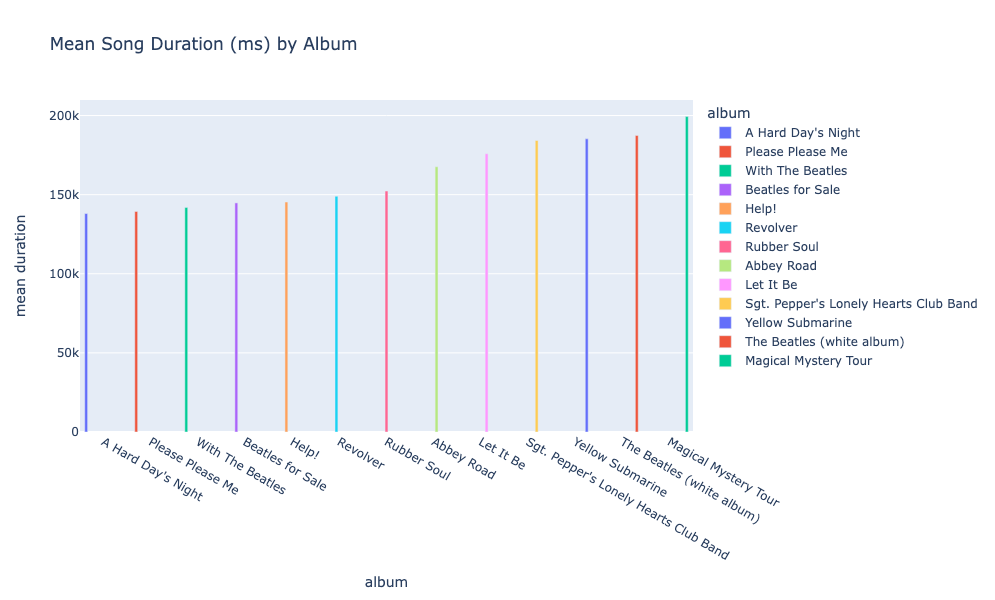

In [17]:
# sort the df by avg. duration
album_durs_df_sorted = album_durs_df.sort_values('mean duration')

# here is where we create the chart
fig = px.bar(album_durs_df_sorted, #  the name of our df
             x='album', # the x axis data
             y='mean duration', # the y axis data
             color = 'album', # colors in the legend and chart assigned according to this column
             barmode='group', # how to group or stack the bars
             title='Mean Song Duration (ms) by Album') # title for our chart

# Update layout for better visualization
fig.update_layout(width=800, height=600)

# Show the figure
fig.show()

- Sorting by year is slightly tricky!
- Our original dataset the 'year' values are the years of the _songs_, not the album per se
- So we can create a new album_year column for the task

In [18]:
album_durs_df.album.unique()

array(["A Hard Day's Night", 'Abbey Road', 'Beatles for Sale', 'Help!',
       'Let It Be', 'Magical Mystery Tour', 'Please Please Me',
       'Revolver', 'Rubber Soul', "Sgt. Pepper's Lonely Hearts Club Band",
       'The Beatles (white album)', 'With The Beatles',
       'Yellow Submarine'], dtype=object)

In [19]:
album_dict = {
    "Please Please Me": 1963,
    "With The Beatles": 1963,
    "A Hard Day's Night": 1964,
    "Beatles for Sale": 1964,
    "Help!": 1965,
    "Rubber Soul": 1965,
    "Revolver": 1966,
    "Sgt. Pepper's Lonely Hearts Club Band": 1967,
    "Magical Mystery Tour": 1967,
    "The Beatles (white album)": 1968,
    "Yellow Submarine": 1969,
    "Abbey Road": 1969,
    "Let It Be": 1970
}

In [20]:
# avs song duration per album 
album_durs = beatles_spotify_clean.groupby('album')['duration_ms'].mean().round()
# now as a df
album_durs_df = pd.DataFrame(album_durs).reset_index()
# rename the columns to something nicer
album_durs_df.rename(columns = {'duration_ms' : 'mean duration'}, inplace=True)
# apply the dict to create new album year col
album_durs_df['album_year'] = album_durs_df['album'].map(album_dict)
# sort the df year
album_durs_df_sorted = album_durs_df.sort_values('album_year')

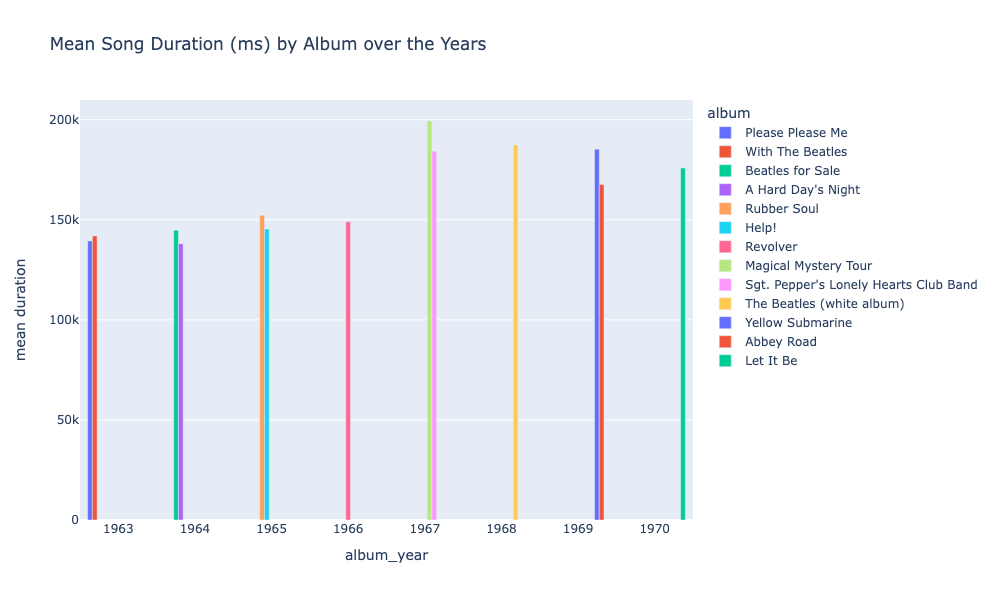

In [21]:
fig = px.bar(album_durs_df_sorted,
             x='album_year',
             y='mean duration',
             color='album',
             barmode='group',  # move it here
             title='Mean Song Duration (ms) by Album over the Years')

fig.update_layout(width=800, height=600)
# Show the figure
fig.show()

In [22]:
# dict for mapping

beatles_albums = {
    "Please Please Me": 1963,
    "With The Beatles": 1963,
    "A Hard Day's Night": 1964,
    "Beatles for Sale": 1964,
    "Help!": 1965,
    "Rubber Soul": 1965,
    "Revolver": 1966,
    "Sgt. Pepper's Lonely Hearts Club Band": 1967,
    "Magical Mystery Tour": 1967,
    "The Beatles (white album)": 1968,
    "Yellow Submarine": 1969,
    "Abbey Road": 1969,
    "Let It Be": 1970
}

In [23]:
# new year column based on map dict
album_durs_df['album_year'] = album_durs_df['album'].map(beatles_albums)

# sort the df by avg. duration
album_durs_df_sorted = album_durs_df.sort_values('album_year')
album_durs_df_sorted
# # here is where we create the chart
fig = px.bar(album_durs_df_sorted, #  the name of our df
             x='album', # the x axis data
             y='mean duration', # the y axis data
             color = 'album', # colors in the legend and chart assigned according to this column
             title='Mean Song Duration (ms) by Album, sorted by Year') # title for our chart

# Update layout for better visualization
fig.update_layout(barmode='group', width=800, height=600)

# Show the figure
fig.show()


In [24]:
# back to spotify clean (since audio features are separate
selected_album = 'Rubber Soul' # choosing our album

my_album = beatles_spotify_clean[beatles_spotify_clean['album'] == selected_album] # note that we are passing in the selected ID


selected_audio_features = ['energy', 'acousticness', 'valence'] # note that we are choosing the audio features here

fig = px.bar(my_album,
             x='song',
             y=selected_audio_features,
             title=f'Comparing Audio Features by Song in {selected_album}') # note here the use of "f-string" to pass the same variable to the title

# Update layout for better visualization|
fig.update_layout(barmode='group', width=1000, height=600) # w and h in pixels

# Show the figure
fig.show()

### 2e  Bar Chart based on Grouped Data

In [25]:
beatles_bb_spotify_tidy.head()

,song,key,mode,tempo,time_signature,duration_ms,audio_feature,value,year,album.debut.uk,album.debut.us,genre,songwriter,lead.vocal,top.50.billboard
0,A Day in the Life,4,0,163.219,4,337413,danceability,0.364,1967,Sgt. Pepper's Lonely Hearts Club Band,None,psychedelic rock,Lennon and McCartney,Lennon and McCartney,0
1,A Day in the Life,4,0,163.219,4,337413,danceability,0.364,1967,Sgt. Pepper's Lonely Hearts Club Band,None,art rock,Lennon and McCartney,Lennon and McCartney,0
2,A Day in the Life,4,0,163.219,4,337413,danceability,0.364,1967,Sgt. Pepper's Lonely Hearts Club Band,None,pop rock,Lennon and McCartney,Lennon and McCartney,0
3,A Day in the Life,4,0,163.219,4,337413,valence,0.175,1967,Sgt. Pepper's Lonely Hearts Club Band,None,psychedelic rock,Lennon and McCartney,Lennon and McCartney,0
4,A Day in the Life,4,0,163.219,4,337413,valence,0.175,1967,Sgt. Pepper's Lonely Hearts Club Band,None,art rock,Lennon and McCartney,Lennon and McCartney,0


In [26]:
# what about the mean value for _each_ audio feature?

album_audio_features = pd.DataFrame(beatles_bb_spotify_tidy.groupby(['year', 'album.debut.uk', 'audio_feature'])['value'].mean().round(4)).reset_index()
album_audio_features.rename(columns = {'album.debut.uk' : 'album'}, inplace=True)
album_audio_features.sample(10)

,year,album,audio_feature,value
1,1962,Please Please Me,danceability,0.5573
37,1965,Rubber Soul,danceability,0.6061
49,1966,Revolver,danceability,0.4846
112,1970,Let It Be,speechiness,0.0554
7,1963,Please Please Me,danceability,0.5290
87,1968,The Beatles,liveness,0.3122
3,1962,Please Please Me,liveness,0.1282
60,1967,Magical Mystery Tour,acousticness,0.3303
12,1963,With the Beatles,acousticness,0.4116
4,1962,Please Please Me,speechiness,0.0469


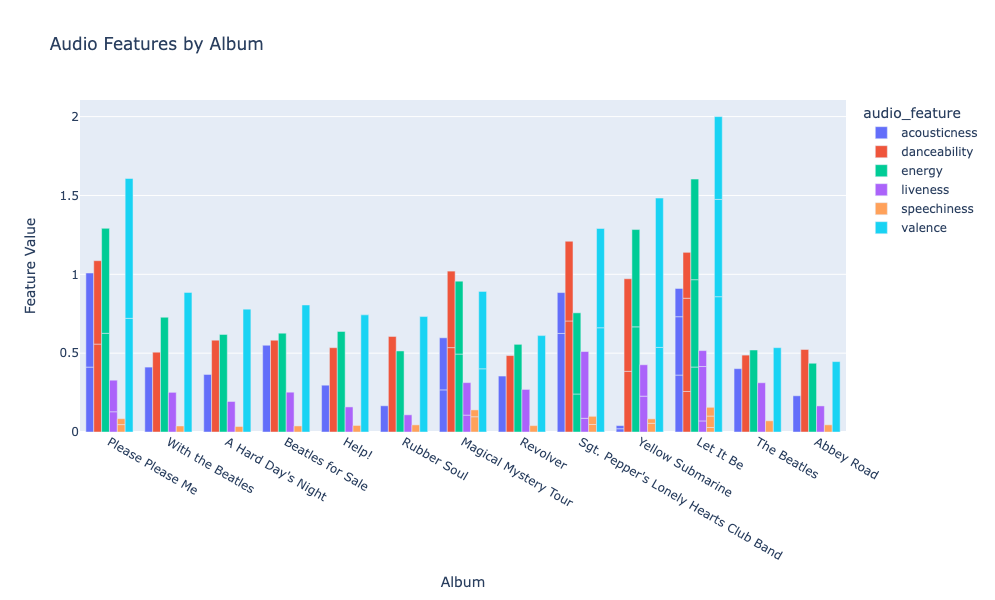

In [27]:
df = album_audio_features

fig_bar = px.bar(
    df,
    x='album',
    y='value',
    color='audio_feature',
    barmode='group',
    title='Audio Features by Album',
    labels={'value': 'Feature Value', 'album': 'Album'}
)

# Update layout for better visualization|
fig_bar.update_layout(barmode='group', 
                      width=1000, 
                      height=600)
fig_bar.show()

### 2g Scatter and Correlation Plots of Spotify Data

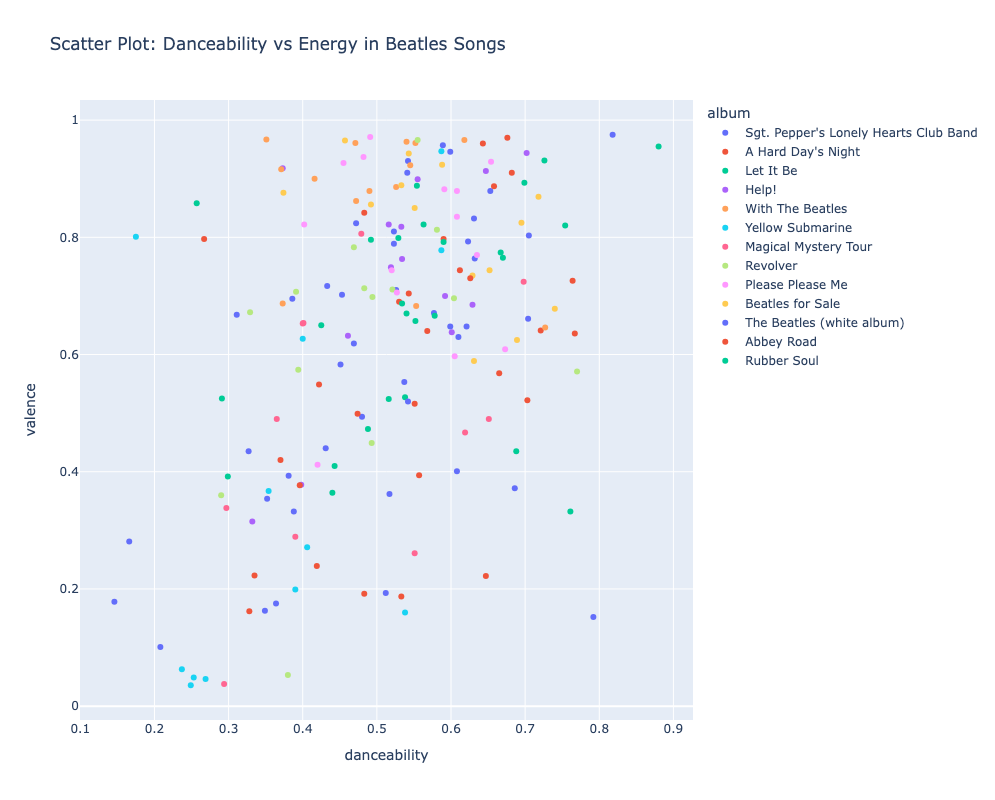

In [28]:

# here we work with the spotify data
df = beatles_spotify_clean

# set up audio features
x_feature = 'danceability'
y_feature  = 'valence'

fig = px.scatter(
    df,
    x = x_feature, # x axis variable
    y = y_feature, # y axis variable
    color = 'album', # color for legend
    title = 'Scatter Plot: Danceability vs Energy in Beatles Songs', # title for chart
    hover_data=['song', 'album', x_feature , y_feature ] # which data appear when you hover over the dots
    
)

# Update layout for better visualization|
fig.update_layout(width=800, 
                  height=800)

fig.show()

- You can also create a 'grid' of correlation plots for *every combination* of audio feature pairs!
- Or even some 'heat maps' that highlight related features!

- See [Tutorial to learn how](https://github.com/RichardFreedman/Encoding_Music/blob/main/01_Tutorials/08_Pandas_Graphs_and_Charts.md#correlation-plots-and-heatmaps)

- For this you will need to use the _wide_ format Spotify data, not the _tidy_ version!

- The correlation function will only work with numberical data, so let's get the relevant columns:

```python
_cols = ['album', 'song', 'energy', 'speechiness', 'acousticness', 
         'instrumentalness', 'liveness', 'valence']

spotify_selected = beatles_spotify_clean[_cols]
selected_albums = ['Rubber Soul', 'Let It Be']
album_data = spotify_selected[spotify_selected['album'].isin(selected_albums)]
```


In [29]:
_cols = ['album', 'song', 'energy', 'speechiness', 'acousticness', 
         'instrumentalness', 'liveness', 'valence']

spotify_selected = beatles_spotify_clean[_cols]
selected_albums = ['Rubber Soul', 'Let It Be']

album_data = spotify_selected[spotify_selected['album'].isin(selected_albums)]
album_data.head(10)

,album,song,energy,speechiness,acousticness,instrumentalness,liveness,valence
2,Let It Be,Across the Universe,0.412,0.0287,0.36100,0.000087,0.0702,0.858
32,Let It Be,Dig a Pony,0.478,0.0388,0.47200,0.000000,0.1700,0.527
33,Let It Be,Dig It,0.489,0.1170,0.65900,0.001900,0.4570,0.670
39,Rubber Soul,Drive My Car,0.571,0.0421,0.01730,0.000000,0.3000,0.820
48,Let It Be,For You Blue,0.556,0.0855,0.24000,0.048300,0.2400,0.955
49,Let It Be,Get Back,0.592,0.0586,0.49200,0.006260,0.6100,0.332
51,Rubber Soul,Girl,0.294,0.0294,0.58700,0.000000,0.1170,0.893
71,Let It Be,I Me Mine,0.638,0.0554,0.17900,0.000000,0.1010,0.525
80,Rubber Soul,if I needed someone,0.755,0.0331,0.00748,0.000000,0.1020,0.796
86,Rubber Soul,I'm Looking Through You,0.498,0.0364,0.00772,0.000000,0.0481,0.774


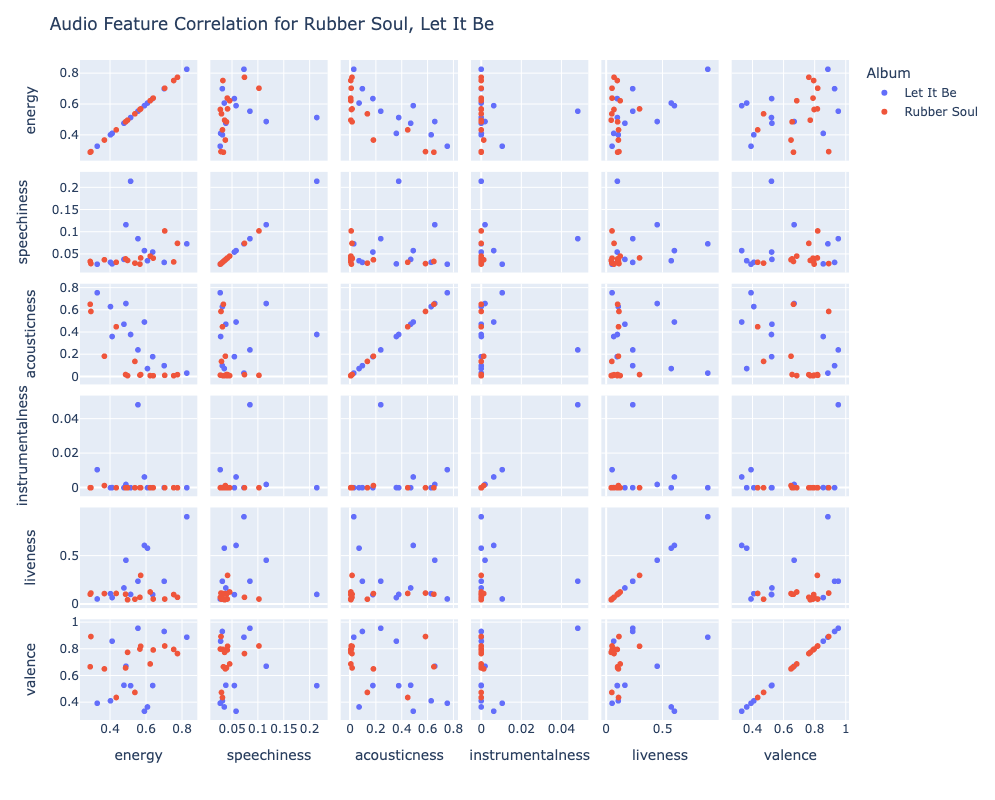

In [30]:
# now let's make the scatter_matrix
feature_cols = ['energy', 'speechiness', 'acousticness', 
                'instrumentalness', 'liveness', 'valence']

fig = px.scatter_matrix(
    album_data,
    dimensions=feature_cols,
    color='album',
    hover_data=['song', 'album'],   # these appear in the tooltip
    labels={'album': 'Album'}
)

fig.update_layout(
    title=f'Audio Feature Correlation for {", ".join(selected_albums)}',
    width=800,
    height=800
)
fig.show()

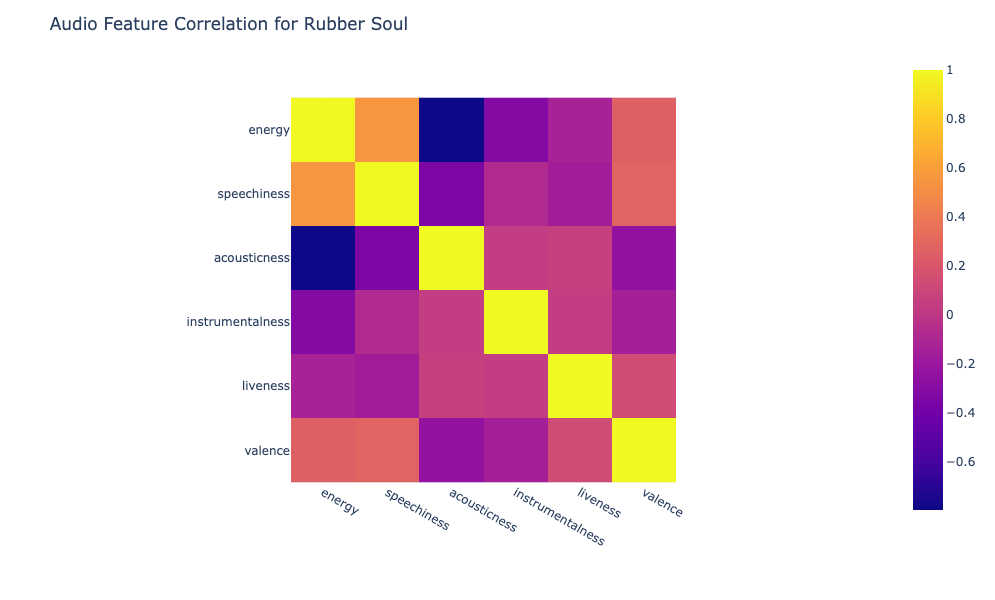

In [31]:

selected_albums = ['Rubber Soul']
selected_album_data = beatles_spotify_clean[beatles_spotify_clean['album'].isin(selected_albums)]

feature_cols = ['energy', 'speechiness', 'acousticness', 
                'instrumentalness', 'liveness', 'valence']
spotify_selected_albums = selected_album_data[feature_cols]

correlation_matrix = spotify_selected_albums.corr()

fig = px.imshow(correlation_matrix)

fig.update_layout(
    title=f'Audio Feature Correlation for {", ".join(selected_albums)}',
    width=600,
    height=600
)
fig.show()

### 2h  Radar Plot Audio Features

- Plotly Express `line_polar` provides a good way to show _several_ audio feature variables at the same time.

- The Tidy Data system makes this relatively painless!

```python
# first declare feature list:
feature_list = ["danceability", "energy", "speechiness", "liveness", "instrumentalness", "acousticness", "valence", "danceability"]


# filter our data (in this case to album title)
selected_album = 'Rubber Soul'
album_data = beatles_bb_spotify_tidy[beatles_bb_spotify_tidy['album.debut.uk'] == selected_album]

# filter for the selected features
filtered_data = album_data[album_data['audio_feature'].isin(feature_list)

# title for the chart
chart_title = f"Radar Plot of Audio Features in {selected_album}"

# now make the chart
fig = px.line_polar(filtered_data, 
                    r='value',  # this is the audio feature scalar
                    theta='audio_feature', # these are 
                    color='song', 
                    labels={'song': "Song"},
                    line_close=True)  # Add this line to make the radar plot closed

fig.update_layout(title=chart_title)
# Update layout for better visualization|
fig.update_layout(barmode='group', width=800, height=800)

fig.show() 
```

In [32]:
# check columns
beatles_bb_spotify_tidy.columns

Index(['song', 'key', 'mode', 'tempo', 'time_signature', 'duration_ms',
       'audio_feature', 'value', 'year', 'album.debut.uk', 'album.debut.us',
       'genre', 'songwriter', 'lead.vocal', 'top.50.billboard'],
      dtype='object')

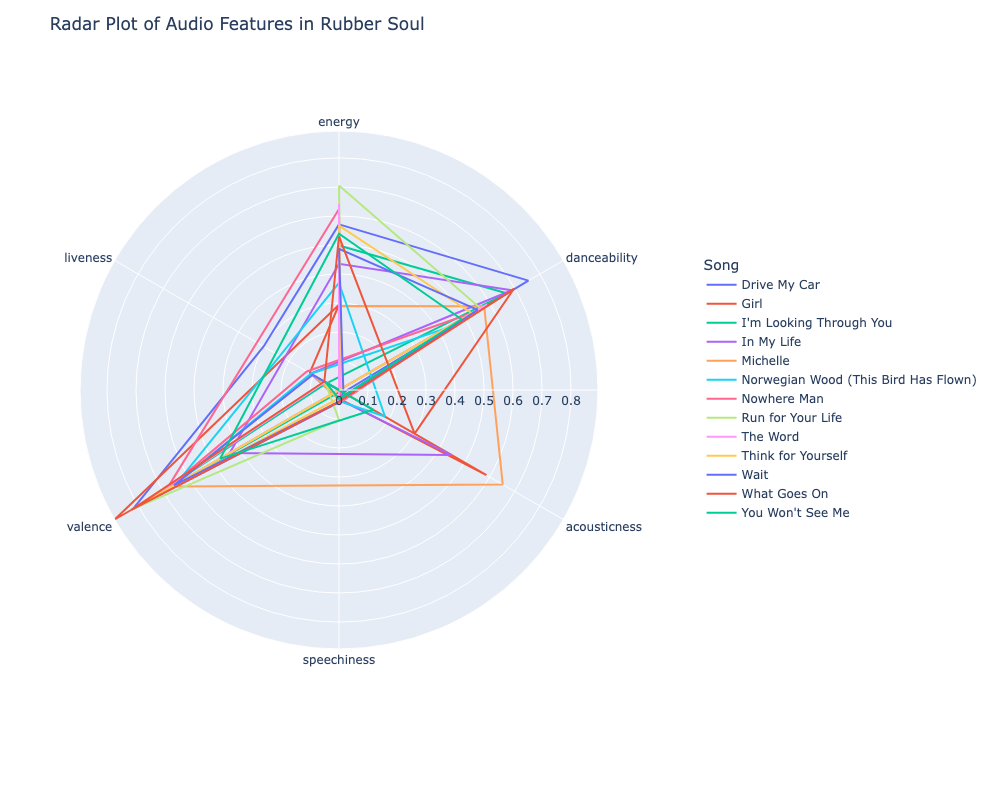

In [33]:


# filter our data (in this case to album title)
selected_albums = ['Rubber Soul']
album_data = beatles_bb_spotify_tidy[beatles_bb_spotify_tidy['album.debut.uk'].isin(selected_albums)]

# filter for the selected features
feature_list = ["danceability", "energy", "speechiness", "liveness", "instrumentalness", "acousticness", "valence"]
filtered_data = album_data[album_data['audio_feature'].isin(feature_list)]

# title for the chart
chart_title = f"Radar Plot of Audio Features in {selected_album}"

# now make the chart
fig = px.line_polar(filtered_data, 
                    r='value',  # this is the audio feature scalar
                    theta='audio_feature', # these are 
                    color='song', 
                    labels={'song': "Song"},
                    line_close=True)  # Add this line to make the radar plot closed

fig.update_layout(title=chart_title,
                  width=800, 
                  height=800,
                 legend=dict(
        x=1.2,    # push further right (1.0 = right edge of plot area)
        y=0.5,    # vertically centered
        xanchor='left',
        yanchor='middle')
                 )


fig.show() 




### 2i. Bubble Chart Genres

- Here we can use Billboard data, or Our Beatles Data
- Review the column names so you keep track of which to use for the groupby operation!

In [34]:
beatles_bb_spotify_tidy.columns

Index(['song', 'key', 'mode', 'tempo', 'time_signature', 'duration_ms',
       'audio_feature', 'value', 'year', 'album.debut.uk', 'album.debut.us',
       'genre', 'songwriter', 'lead.vocal', 'top.50.billboard'],
      dtype='object')

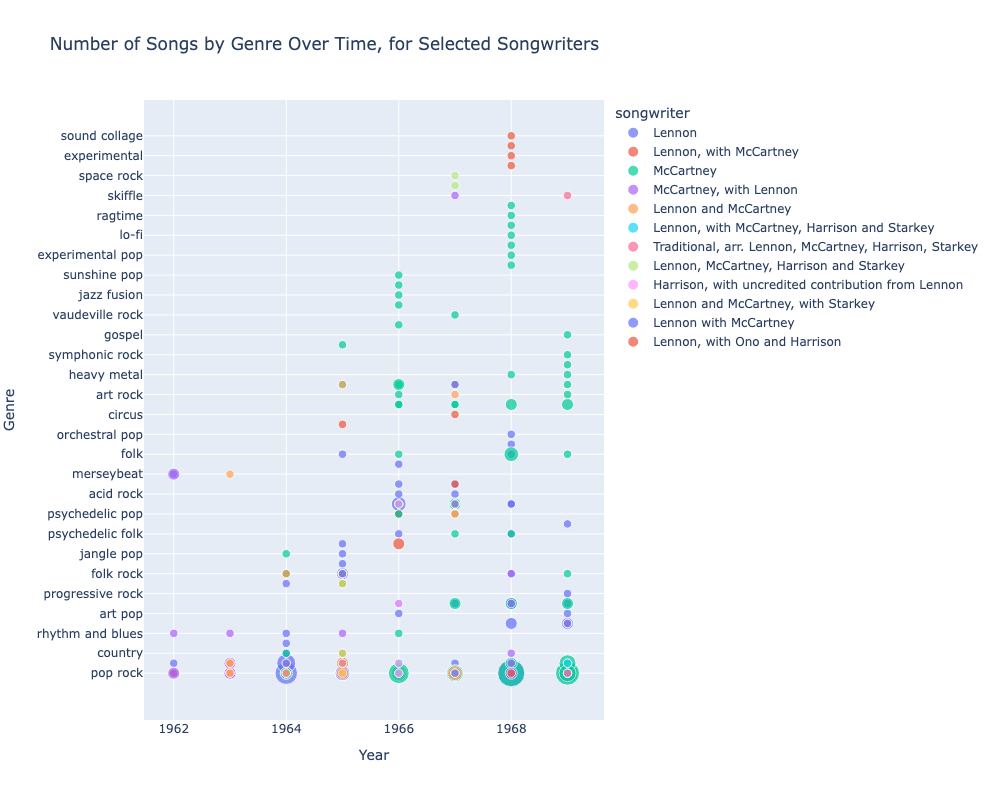

In [35]:
# get counts of genres
genre_counts = beatles_bb_spotify_tidy.groupby(['album.debut.uk', 'year', 'songwriter'])['genre'].value_counts().reset_index()

# which songwriters
substrings = ['Lennon', 'McCartney']


john_paul = genre_counts[genre_counts['songwriter'].str.contains('|'.join(substrings))]


# Create the scatter plot
fig = px.scatter(
    john_paul,
    x='year',
    y='genre',
    size='count',
    color='songwriter',
    hover_data=['count'],
    labels={
        'x': 'Year',
        'y': 'Genre',
        'size': 'Number of Songs',
        'color': 'Genre'
    },
    title="Number of Songs by Genre Over Time, for Selected Songwriters"
)

# Customize the plot
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Genre",
    showlegend=True,

    width=1000,  # Set width to 800px
    height=800,  # Set height to 800px
)

# Show the plot
fig.show()

### 2j.  Sankey Chart

- Sankey charts can be an interesting way of showing connections among different categorical data.
- In this example we show the 'flow' of songs in two different albums according to their danceability.  We previously turned the Spotify scalar danceability ratings into 'low', 'middle', and 'high' categoricals using `pd.qcut`, like this:

In [36]:
beatles_spotify_clean.columns

Index(['year', 'album', 'song', 'spotify url', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'Dance Tune', 'dance_binned'],
      dtype='object')

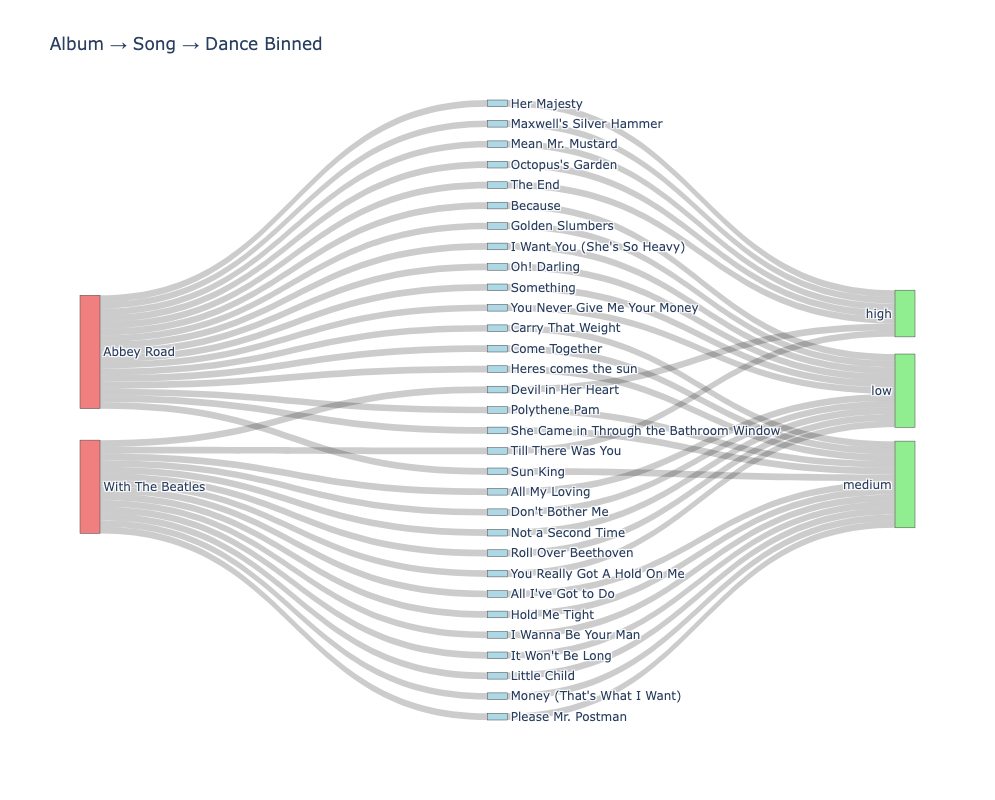

In [37]:
# copy data for safety
beatles_audio_data = beatles_spotify_clean.copy()

# select feature to 'bin'
beatles_audio_data['dance_binned'] = pd.qcut(beatles_audio_data["danceability"], q=3, labels=['low', 'medium', 'high'])

# select albums
df = beatles_audio_data[beatles_audio_data['album'].isin(['With The Beatles', 'Abbey Road'])].copy()

# Configure your columns here - just change the chosen_feature to any column name
album_col = 'album'
song_col = 'song'
chosen_feature = 'dance_binned'  # you could bin a different column above!

# Create count column for flow values
df['count'] = 1

# Create Album → Song links
album_song_links = df.groupby([album_col, song_col])['count'].sum().reset_index()
album_song_links.columns = ['source', 'target', 'value']

# Create Song → Feature links
song_feature_links = df.groupby([song_col, chosen_feature])['count'].sum().reset_index()
song_feature_links.columns = ['source', 'target', 'value']

# Get unique nodes for each tier
albums = sorted(df[album_col].unique())
songs = sorted(df[song_col].unique())
features = sorted([str(feature) for feature in df[chosen_feature].unique()])

# Create complete node list
all_nodes = albums + songs + features

# Create node index mapping
node_to_index = {node: idx for idx, node in enumerate(all_nodes)}

# Create source and target index lists
sources = []
targets = []
values = []

# Add Album → Song links
for _, row in album_song_links.iterrows():
    sources.append(node_to_index[row['source']])
    targets.append(node_to_index[row['target']])
    values.append(row['value'])

# Add Song → Feature links
for _, row in song_feature_links.iterrows():
    sources.append(node_to_index[row['source']])
    targets.append(node_to_index[str(row['target'])])
    values.append(row['value'])

# Create node colors
num_albums = len(albums)
num_songs = len(songs)
num_features = len(features)

node_colors = (['lightcoral'] * num_albums +      # Albums in light coral
              ['lightblue'] * num_songs +          # Songs in light blue  
              ['lightgreen'] * num_features)       # Features in light green

# Simple Sankey with automatic positioning
fig = go.Figure(data=[go.Sankey(
    node=dict(
        label=all_nodes,
        color=node_colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
)])

# Dynamic title based on chosen feature
feature_name = chosen_feature.replace('_', ' ').title()
fig.update_layout(title=f"Album → Song → {feature_name}",
                 height=800)
fig.show()

# 3. Interpretation

What did you learn from the results? How were your expectations confirmed (or not)?

What limitations did the data or your methods impose on your capacity to answer the questions you originally posed?

How do your results change your views of the readings or ideas that motivated your work it the first place? How do your results shape your listening experience of the music you considered? What next steps do you imagine for future work?

# 4. Bibliography

A list of the sources consulted and cited during your work, including class readings or code resources, Spotify lists, etc. See the Notebook Style Guide and Music Style Guide for details about how to cite books, articles, internet resources, etc.